<a href="https://colab.research.google.com/github/wrwilliam/machine-learning-basic/blob/master/WR_COVID_19_pre_RamCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final project:
Team Member: Wei Ruan (001532991), 

**Coronavirus Prediction**

# 1. Data Preprocess

1. Import Packages; 
2. Data Loading; 
3. Data Overview;
4. Data Cleansing for Further Prediction

In [1]:
! pip install pmdarima
! pip install -q -U keras-tuner
! pip install -q -U autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 27.3 MB/s eta 0:00:00


In [2]:
import pandas as pd       # to store and process data in dataframe
import numpy as np        # for numerical analysis

import matplotlib.pyplot as plt      # basic visualization package
import matplotlib.colors as mcolors
import seaborn as sns      # advanced ploting
import random
import math
import time
import datetime
from numpy import nan as NA

# Load specific forecasting tools
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import KFold
import keras_tuner
from kerastuner import HyperModel
from tensorflow import keras
from kerastuner.tuners import RandomSearch, Hyperband


from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # for determining (p,q) orders
import pmdarima as pm
from pmdarima import auto_arima # for determining ARIMA orders

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR

import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#pio.write_html(fig, file="index.html", auto_open=True)

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<ipython-input-2-97031f339bf9>:23: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel
<ipython-input-2-97031f339bf9>:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-25-2022.csv')
us_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-25-2022.csv')



In [4]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-08-26 04:21:02,33.93911,67.709953,191967,7771,NaN,NaN,Afghanistan,493.129157,4.048092
1,NaN,NaN,NaN,Albania,2022-08-26 04:21:02,41.15330,20.168300,327607,3579,NaN,NaN,Albania,11383.939120,1.092467
2,NaN,NaN,NaN,Algeria,2022-08-26 04:21:02,28.03390,1.659600,270097,6878,NaN,NaN,Algeria,615.942020,2.546493
3,NaN,NaN,NaN,Andorra,2022-08-26 04:21:02,42.50630,1.521800,46027,154,NaN,NaN,Andorra,59570.309972,0.334586
4,NaN,NaN,NaN,Angola,2022-08-26 04:21:02,-11.20270,17.873900,102636,1917,NaN,NaN,Angola,312.283707,1.867766


In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [7]:
us_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2022-08-26 04:34:15,32.3182,-86.9023,1479605,20048,NaN,NaN,1.0,...,NaN,NaN,1.354956,84000001.0,USA,NaN,NaN,2022-08-25,NaN,NaN
1,Alaska,US,2022-08-26 04:34:15,61.3707,-152.4044,293076,1338,NaN,NaN,2.0,...,NaN,NaN,0.456537,84000002.0,USA,NaN,NaN,2022-08-25,NaN,NaN
2,American Samoa,US,2022-08-26 04:34:15,-14.2710,-170.1320,8168,34,NaN,NaN,60.0,...,NaN,NaN,0.416259,16.0,ASM,NaN,NaN,2022-08-25,NaN,NaN
3,Arizona,US,2022-08-26 04:34:15,33.7298,-111.4312,2245713,31047,NaN,NaN,4.0,...,20585287.0,NaN,1.382501,84000004.0,USA,282814.773538,NaN,2022-08-25,NaN,NaN
4,Arkansas,US,2022-08-26 04:34:15,34.9697,-92.3731,927072,11887,NaN,NaN,5.0,...,5435506.0,NaN,1.282209,84000005.0,USA,180114.613143,NaN,2022-08-25,NaN,NaN


In [8]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             0 non-null      float64
 8   Active                0 non-null      float64
 9   FIPS                  58 non-null     float64
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    37 non-null     float64
 12  People_Hospitalized   0 non-null      float64
 13  Case_Fatality_Ratio   58 non-null     float64
 14  UID                   58 non-null     float64
 15  ISO3                  58 

In [9]:
cols = confirmed_df.keys()
print(cols)
# get rid of the first 4 columns, get all the dates data only
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
fatality_rate = []

# for loop to sum and divide to get rates for use afterward
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate fatality rates
    fatality_rate.append(death_sum/confirmed_sum)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


In [10]:
# for loop the data to get daily_increase and moving_average function for further calculation
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# set the window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


In [11]:
days_since = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [12]:
print(days_since.dtype)
print(days_since.ndim)

int64
2


In [13]:
world_cases[:10]

array([[ 557],
       [ 657],
       [ 944],
       [1437],
       [2120],
       [2929],
       [5580],
       [6169],
       [8237],
       [9927]])

In [14]:
total_deaths[:10]

array([[ 17],
       [ 18],
       [ 26],
       [ 42],
       [ 56],
       [ 82],
       [131],
       [133],
       [172],
       [214]])

# 2. Covid-19 Trend Visualization
### Covid-19 Virus With Numbers
1. Confirmed -- Cumulative number of confirmed cases till that date
2. Deaths -- Cumulative number of of deaths till that date
3. Recovered -- Cumulative number of recovered cases till that date
4. Active -- Active Cases
5. Recovered Cases Rate % -- rate of Recovered Cases from total of Confirmed cases in same Country
6. Deaths Cases Rate % -- rate of death Cases from total of Confirmed cases in same Country
7. Total Cases Rate % -- rate of total cases from Total cases in the world

In [15]:
latest_data.rename(columns={'Last_Update':'Date', 'Country_Region':'Country'}, inplace=True)
latest_data.head()

,FIPS,Admin2,Province_State,Country,Date,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-08-26 04:21:02,33.93911,67.709953,191967,7771,NaN,NaN,Afghanistan,493.129157,4.048092
1,NaN,NaN,NaN,Albania,2022-08-26 04:21:02,41.15330,20.168300,327607,3579,NaN,NaN,Albania,11383.939120,1.092467
2,NaN,NaN,NaN,Algeria,2022-08-26 04:21:02,28.03390,1.659600,270097,6878,NaN,NaN,Algeria,615.942020,2.546493
3,NaN,NaN,NaN,Andorra,2022-08-26 04:21:02,42.50630,1.521800,46027,154,NaN,NaN,Andorra,59570.309972,0.334586
4,NaN,NaN,NaN,Angola,2022-08-26 04:21:02,-11.20270,17.873900,102636,1917,NaN,NaN,Angola,312.283707,1.867766


In [16]:
#Missing Values
latest_data.isnull().sum().to_frame('nulls')

,nulls
FIPS,748
Admin2,744
Province_State,179
Country,0
Date,0
Lat,91
Long_,91
Confirmed,0
Deaths,0
Recovered,4012


In [17]:
df = latest_data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sorted_By_Confirmed=df.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')

world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total

world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

In [18]:
# Top countries sorted by the Confirmed Cases
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')

Sorted By Confirmed Cases


,Date,Country,Confirmed,Deaths,Recovered,Active,Recovered Cases Rate %,Deaths Cases Rate %,Total Cases Rate %
194,2022-08-26 04:21:02,US,94043288,1043098,0.000000,93000190.000000,0.000000,1.109168,15.682503
88,2022-08-26 04:21:02,India,44389176,527556,0.000000,43861620.000000,0.000000,1.188479,7.402265
71,2022-08-26 04:21:02,France,34644718,154846,0.000000,34489872.000000,0.000000,0.446954,5.777296
32,2022-08-26 04:21:02,Brazil,34350639,683233,0.000000,33667406.000000,0.000000,1.988996,5.728256
75,2022-08-26 04:21:02,Germany,31970779,146913,0.000000,31823866.000000,0.000000,0.459523,5.331394
198,2022-08-26 04:21:02,United Kingdom,23708470,207496,0.000000,23500974.000000,0.000000,0.875198,3.953585
102,2022-08-26 04:21:02,"Korea, South",22802985,26413,0.000000,22776572.000000,0.000000,0.115831,3.802588
94,2022-08-26 04:21:02,Italy,21745065,175127,0.000000,21569938.000000,0.000000,0.805364,3.626171
155,2022-08-26 04:21:02,Russia,18985174,376052,0.000000,18609122.000000,0.000000,1.980767,3.165936
96,2022-08-26 04:21:02,Japan,17997394,38240,0.000000,17959154.000000,0.000000,0.212475,3.001216


### Cases Rate per country of total cases Globally

cases rate per country of total cases in the world 


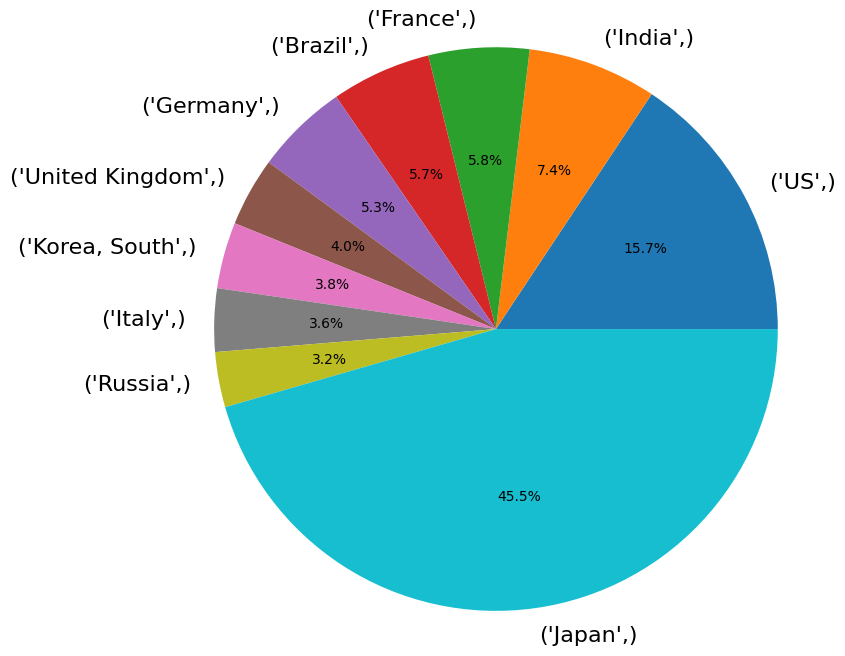

In [19]:
Top7=sorted_By_Confirmed.iloc[0:9,-1].values
others=sorted_By_Confirmed.iloc[9:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates=np.concatenate((x, x2), axis=None)

rate_perCountry=pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(10)] ,columns=['rate'])
rate_perCountry.rename(index={'Turkey': "other Countries"},inplace=True)


labels=rate_perCountry.index
sizes=rate_perCountry['rate'].values

explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print("cases rate per country of total cases in the world ")
plt.show()

# 3. Predictions for confirmed coronavirus cases Globally 
#### Using confirmed cases data, fit ARIMA model to predict future covid cases on a global level.
1. Exploratory data analysis
2. ARIMA Model Building and Prediction

### 1. Exploratory data analysis

#### Confirmed and Deaths Cases Globally

In [20]:
# EDA Data(Exploratory data analysis)
forecast1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

EDA_dates = []
for i in range(len(forecast1)):
    EDA_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y')) 

eda_world_cases = pd.DataFrame(world_cases)
eda_total_deaths = pd.DataFrame(total_deaths)
eda_dates = pd.DataFrame(EDA_dates)
eda_data1 = pd.concat([eda_world_cases, eda_total_deaths], axis = 1, join = 'inner')
eda_data = pd.concat([eda_data1, eda_dates], axis = 1, join = 'inner')
eda_data.columns = ['Confirmed', 'Deaths', 'Dates']
print(eda_data)

px.bar(data_frame=eda_data, y=['Confirmed','Deaths'],x='Dates',title = '<b>Confirmed and Deaths Cases Globally<b>')

      Confirmed   Deaths       Dates
0           557       17  01/22/2020
1           657       18  01/23/2020
2           944       26  01/24/2020
3          1437       42  01/25/2020
4          2120       56  01/26/2020
...         ...      ...         ...
1138  676024901  6877749  03/05/2023
1139  676082941  6878115  03/06/2023
1140  676213378  6879038  03/07/2023
1141  676392824  6880483  03/08/2023
1142  676570149  6881802  03/09/2023

[1143 rows x 3 columns]


#### Confirmed and Fatality Rate of each Country/Region

In [21]:
# Create country_region plot
country = latest_data[latest_data['Date']==latest_data['Date'].max()].sort_values(by='Confirmed',ascending=False)
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=country['Country'], y=country['Confirmed'], name="Confirmed"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=country['Country'], y=country['Case_Fatality_Ratio'], name="Case_Fatality_Ratio"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="<b>Confirmed and Fatality Rate of each Country/Region<b>(Feel free to zoom in)"
)

# Set x-axis title
fig.update_xaxes(title_text="Country")

# Set y-axes titles
fig.update_yaxes(title_text="Confirmed", secondary_y=False)
fig.update_yaxes(title_text="Case_Fatality_Ratio", secondary_y=True)

fig.show()

#### Confirmed COVID-19 cases by country

In [22]:
country2 = latest_data.fillna('NA').groupby(['Country','Province_State','Date'])['Confirmed'].sum() \
                          .groupby(['Country','Province_State']).max().sort_values() \
                          .groupby(['Country']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(country2).head(10)
top10
fig = px.bar(top10, x=top10.index, y='Confirmed', labels={'x':'Country'},
             color="Confirmed", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

#### Choose data from the Date 01/01/2022-08/18/2022, to make graph to see absolute and relative Increase per day

In [23]:
from plotly.subplots import make_subplots

# Absolute and relative Increase per Day Data Preprocess
eda_dates = pd.DataFrame(EDA_dates)
eda_dates.columns = ['Date']
Abs_world_daily_increase = pd.DataFrame(world_daily_increase)
Abs_world_daily_increase.columns = ['Confirmed']
Abs_world_daily_increase['Confirmed_Previous'] = Abs_world_daily_increase['Confirmed'].shift(-1)
Abs_world_daily_increase['Difference'] = Abs_world_daily_increase['Confirmed'] - Abs_world_daily_increase['Confirmed_Previous']
Abs_world_daily_increase['Differece_Previous'] = Abs_world_daily_increase['Difference'].shift(-1)
Abs_world_daily_increase['Increase_quota'] = Abs_world_daily_increase['Difference'] / Abs_world_daily_increase['Differece_Previous']

Abs_world_daily_increase = pd.concat([Abs_world_daily_increase, eda_dates], axis = 1, join = 'inner')

index = Abs_world_daily_increase[Abs_world_daily_increase["Date"]== "01/01/2022"].index.tolist()[0]
print(index)
Abs_world_daily_increase = Abs_world_daily_increase.iloc[710:, ]
print(Abs_world_daily_increase)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=Abs_world_daily_increase["Date"], y=Abs_world_daily_increase["Difference"], name="Absolute increase in cases"))
fig.add_scatter(x=Abs_world_daily_increase['Date'], y=Abs_world_daily_increase['Increase_quota'], name="Increase quota in %", secondary_y=True)

fig.update_layout(title='Absolute and relative Increase per Day')

fig.update_yaxes(title_text="<b>Absolute</b> increase", secondary_y=False)
fig.update_yaxes(title_text="<b>Relative</b> increase in %", secondary_y=True)

fig.show()

710
      Confirmed  Confirmed_Previous  Difference  Differece_Previous  \
710     1203137            918511.0    284626.0          -1419870.0   
711      918511           2338381.0  -1419870.0           -275046.0   
712     2338381           2613427.0   -275046.0             29418.0   
713     2613427           2584009.0     29418.0            -85213.0   
714     2584009           2669222.0    -85213.0           -284416.0   
...         ...                 ...         ...                 ...   
1138      56126             58040.0     -1914.0            -72397.0   
1139      58040            130437.0    -72397.0            -49009.0   
1140     130437            179446.0    -49009.0              2121.0   
1141     179446            177325.0      2121.0                 NaN   
1142     177325                 NaN         NaN                 NaN   

      Increase_quota        Date  
710        -0.200459  01/01/2022  
711         5.162300  01/02/2022  
712        -9.349582  01/03/2022  
713

#### Globally Daily New Cases, Start from 01/22/2020 to 08/18/2022

In [24]:
eda_dates = pd.DataFrame(EDA_dates)
eda_dates.columns = ['Date']
world_daily = pd.DataFrame(world_daily_increase)
world_daily.columns = ['Daily New Confirmed']
# print(world_daily[:10])
world_daily = pd.concat([world_daily, eda_dates], axis = 1, join = 'inner')
world_daily.set_index(['Date'], inplace = True)
print(world_daily[:10])
px.line(world_daily, title = '<b>Globally Daily New Cases<b> (Feel free to zoom in)')

            Daily New Confirmed
Date                           
01/22/2020                  557
01/23/2020                  100
01/24/2020                  287
01/25/2020                  493
01/26/2020                  683
01/27/2020                  809
01/28/2020                 2651
01/29/2020                  589
01/30/2020                 2068
01/31/2020                 1690


## 2. ARIMA Model Building and Prediction

In [25]:
eda_dates = pd.DataFrame(EDA_dates)
eda_dates.columns = ['Date']
world_daily = pd.DataFrame(world_daily_increase)
world_daily.columns = ['Daily New Confirmed']
world_daily = pd.concat([world_daily, eda_dates], axis = 1, join = 'inner')
world_daily.set_index(['Date'], inplace = True)
world_daily.head()

,Daily New Confirmed
Date,
01/22/2020,557
01/23/2020,100
01/24/2020,287
01/25/2020,493
01/26/2020,683


### Check stationarity

#### Write a function that performs the augmented Dickey-Fuller Test.

In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and" + " Stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is" + " Non-Stationary")

In [27]:
adf_test(world_daily['Daily New Confirmed'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.043393
p-value                    0.031036
# lags used               20.000000
# observations          1122.000000
critical value (1%)       -3.436192
critical value (5%)       -2.864119
critical value (10%)      -2.568143
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and Stationary


#### Difference 1 times and Check stationarity again, the result shows that it could be stationary after management

In [28]:
from statsmodels.tsa.statespace.tools import diff
world_daily['Daily New Confirmed_diff1'] = diff(world_daily['Daily New Confirmed'], k_diff = 1)

adf_test(world_daily['Daily New Confirmed_diff1'] ,'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic     -6.661634e+00
p-value                 4.830672e-09
# lags used             2.200000e+01
# observations          1.119000e+03
critical value (1%)    -3.436207e+00
critical value (5%)    -2.864126e+00
critical value (10%)   -2.568147e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and Stationary


In [29]:
world_daily_diff = world_daily['Daily New Confirmed_diff1'].dropna()
print(world_daily_diff)

Date
01/23/2020     -457.0
01/24/2020      187.0
01/25/2020      206.0
01/26/2020      190.0
01/27/2020      126.0
               ...   
03/05/2023     1931.0
03/06/2023     1914.0
03/07/2023    72397.0
03/08/2023    49009.0
03/09/2023    -2121.0
Name: Daily New Confirmed_diff1, Length: 1142, dtype: float64


### ACF and PACF plots

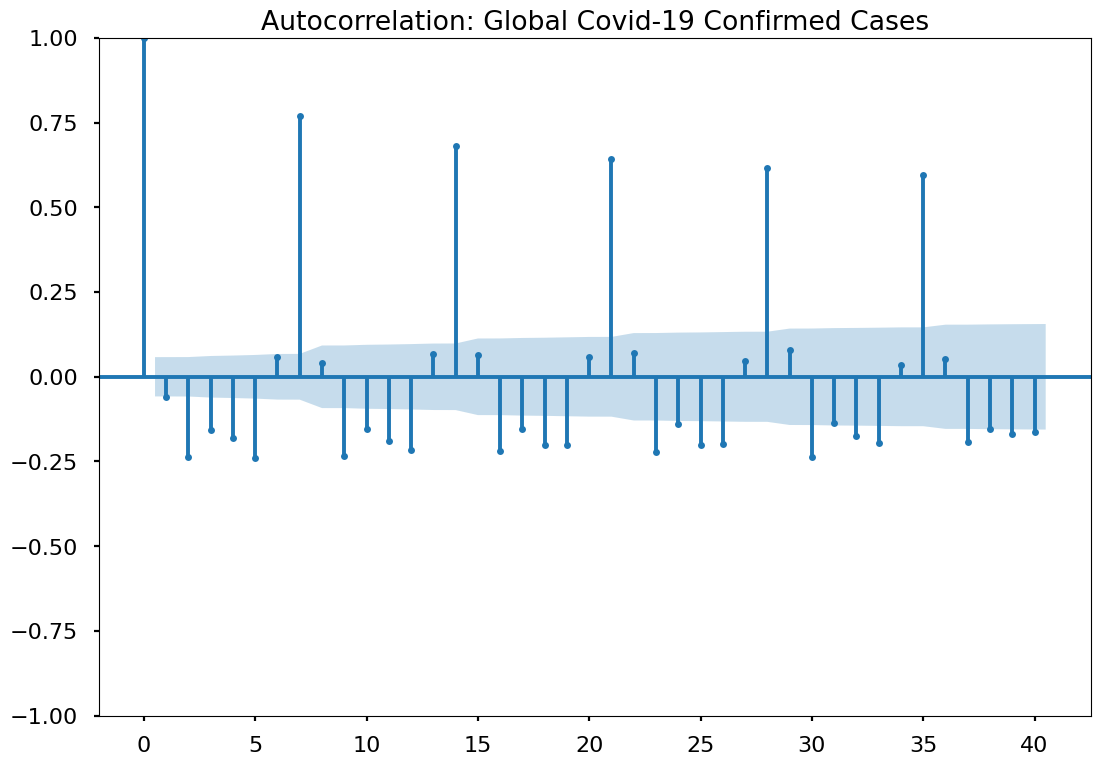

In [30]:
title = 'Autocorrelation: Global Covid-19 Confirmed Cases'
lags = 40
plot_acf(world_daily_diff ,title=title,lags=lags);

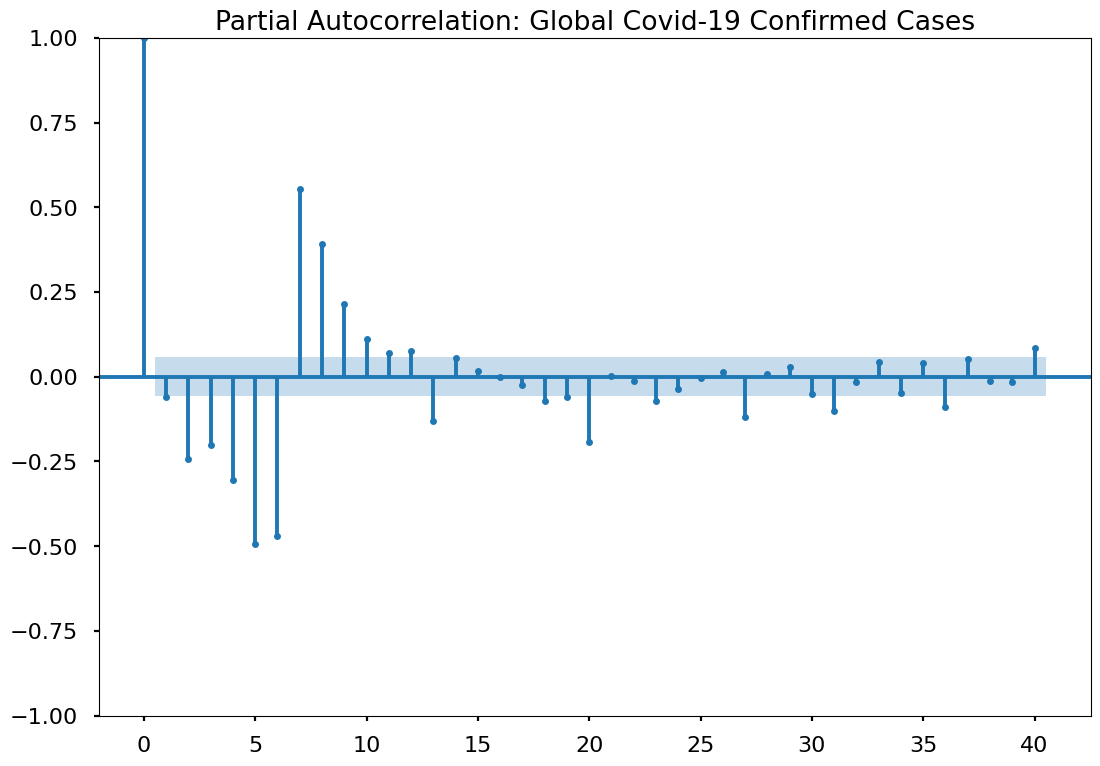

In [31]:
title = 'Partial Autocorrelation: Global Covid-19 Confirmed Cases'
lags = 40
plot_pacf(world_daily_diff,title=title,lags=lags);

### From the plots of the sequences ACF and PACF, obvious tailing or truncation can be found, which again confirms that this dataset is suitable for fitting with the ARIMA model.

### Use pmdarima.auto_arima to determine ARIMA Orders

In [32]:
l = len(world_daily)
stepwise_fit = auto_arima(world_daily['Daily New Confirmed'].iloc[:l-50], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=3,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29811.827, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29809.718, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29804.998, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29809.830, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29664.340, Time=1.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29579.366, Time=0.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29745.427, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29547.706, Time=1.41 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=29703.244, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29169.096, Time=3.84 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29235.433, Time=2.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29115.799, Time=6.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29118.313, Time=4.99 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=29113.824, Time=8.30 sec
 ARIMA(2,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -14549.912
Date:                Tue, 18 Apr 2023   AIC                          29113.824
Time:                        01:35:51   BIC                          29148.795
Sample:                    01-22-2020   HQIC                         29127.058
                         - 01-18-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1386      0.043     26.636      0.000       1.055       1.222
ar.L2         -0.8448      0.050    -16.800      0.000      -0.943      -0.746
ar.L3         -0.1068      0.039     -2.759      0.006      -0.183      -0.031
ma.L1         -1.7532      0.045    -39.134      0.000      -1.841      -1.665
ma.L2          1.4533      0.065     22.489      0.000       1.327       1.580
ma.L3         -0.3990      0.039    -10.131      0.000      -0.476      -0.322
sigma2      2.722e+10   4.04e-13   6.73e+22      0.000    2.72e+10    2.72e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):              6385.86
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              12.88   Skew:                             1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.87e+39. Standard errors may be unstable.
"""

In [33]:
world_daily.head()

,Daily New Confirmed,Daily New Confirmed_diff1
Date,,
01/22/2020,557,NaN
01/23/2020,100,-457.0
01/24/2020,287,187.0
01/25/2020,493,206.0
01/26/2020,683,190.0


## Best model:  ARIMA(3,1,2). This suggests that we should fit an ARIMA(3,1,2) model to best forecast future values of the series.

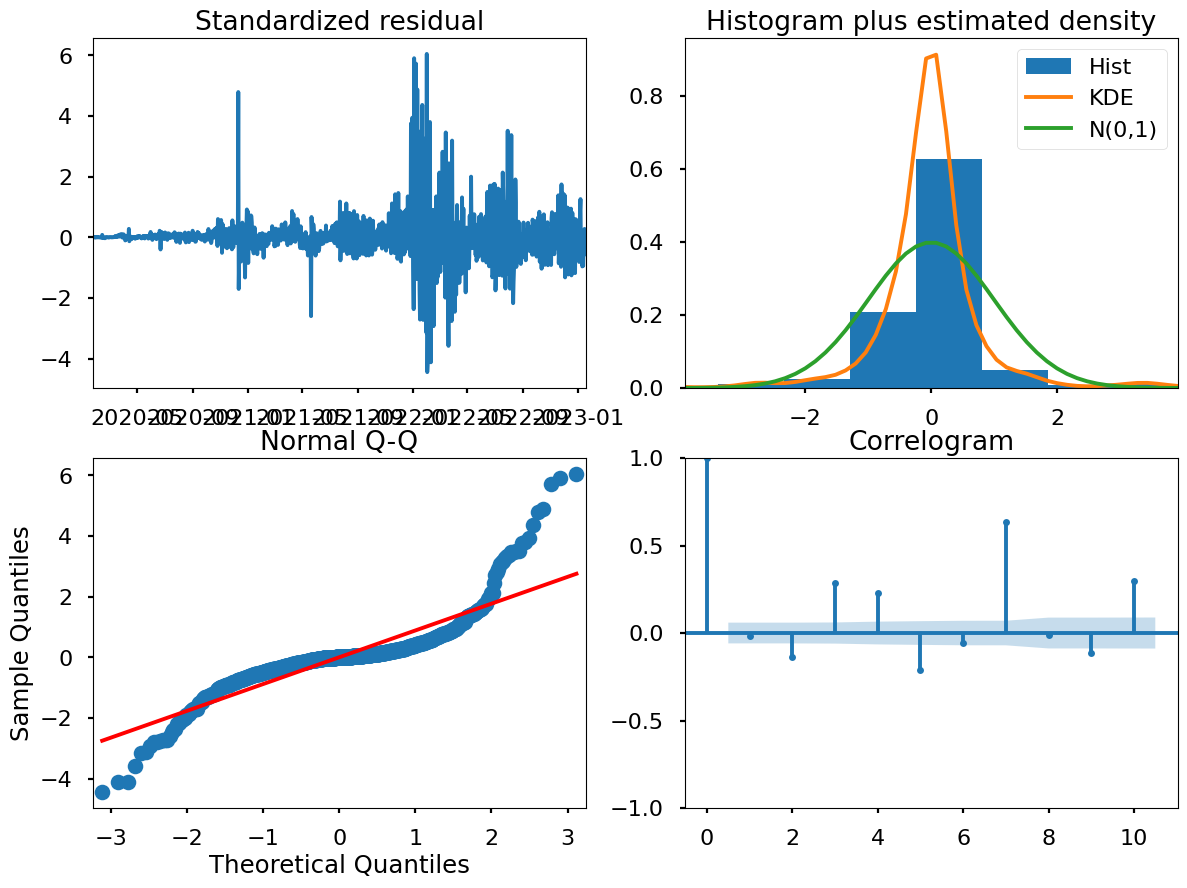

In [34]:
stepwise_fit.plot_diagnostics(figsize=(14,10))
plt.show()

### The diagnostics result is very good, it suggests that the data fits the model very well.

In [35]:
# Set 10 days as test
l = len(world_daily)
train = world_daily['Daily New Confirmed'].iloc[:l-10]
test = world_daily['Daily New Confirmed'].iloc[l-10:]
print(train)

Date
01/22/2020       557
01/23/2020       100
01/24/2020       287
01/25/2020       493
01/26/2020       683
               ...  
02/23/2023    221092
02/24/2023    142426
02/25/2023     45451
02/26/2023     65621
02/27/2023    127025
Name: Daily New Confirmed, Length: 1133, dtype: int64


In [36]:
# Summary of the fitted ARIMA model.
model = ARIMA(train, order=(3,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Daily New Confirmed   No. Observations:                 1133
Model:                  ARIMA(3, 1, 2)   Log Likelihood              -15092.350
Date:                 Tue, 18 Apr 2023   AIC                          30196.700
Time:                         01:35:57   BIC                          30226.891
Sample:                     01-22-2020   HQIC                         30208.106
                          - 02-27-2023                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8830      0.014     64.715      0.000       0.856       0.910
ar.L2         -0.5263      0.015    -34.964      0.000      -0.556      -0.497
ar.L3         -0.3177      0.013    -24.567      0.000      -0.343      -0.292
ma.L1         -1.4058      0.011   -126.330      0.000      -1.428      -1.384
ma.L2          0.8392      0.009     88.435      0.000       0.821       0.858
sigma2      2.039e+10   1.32e-13   1.54e+23      0.000    2.04e+10    2.04e+10
===================================================================================
Ljung-Box (L1) (Q):                  10.10   Jarque-Bera (JB):              6480.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.77   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.31e+39. Standard errors may be unstable.
"""

In [37]:
# set the forecast to 10 days
n_forecast = len(test) + 10
pred = stepwise_fit.predict(n_forecast)

In [38]:
# Index the Dates
dates = pd.date_range(train.index[-1], periods=n_forecast)
dates = dates.strftime('%d/%m/%Y')
pred = pd.DataFrame(pred, index=dates)

In [39]:
df = pd.concat([train, test, pred], axis=1)

In [40]:
df.columns = ['Data Train', 'Data Test', 'Prediction']

In [41]:
df.head()

,Data Train,Data Test,Prediction
01/22/2020,557.0,NaN,NaN
01/23/2020,100.0,NaN,NaN
01/24/2020,287.0,NaN,NaN
01/25/2020,493.0,NaN,NaN
01/26/2020,683.0,NaN,NaN


In [42]:
df.tail()

,Data Train,Data Test,Prediction
14/03/2023,NaN,NaN,NaN
15/03/2023,NaN,NaN,NaN
16/03/2023,NaN,NaN,NaN
17/03/2023,NaN,NaN,NaN
18/03/2023,NaN,NaN,NaN


In [43]:
pd.options.plotting.backend = "plotly"

In [44]:
# plot predicted result
df.plot(x=df.index, y=['Data Train', 'Data Test','Prediction' ])
# plt.plot(x=df.index, y=['Data Train'], marker = '+', linestyle = '--')
# plt.plot(x=df.index, y=['Data Test'], , marker = “o”, linestyle = “--”)
# plt.plot(x=df.index, y=['Prediction' ], marker = “o”, linestyle = “--”)
# df.plot(x=df.index, y=['Data Train', 'Prediction' ])
# df.plot(x=df.index, y=['Data Test','Prediction' ])

In [45]:
# print the prediction in the form of numbers
pred.columns = ["Prediction of Daily New Confirmed Cases"]
pred.style.background_gradient(cmap='Reds')

,Prediction of Daily New Confirmed Cases
27/02/2023,nan
28/02/2023,nan
01/03/2023,nan
02/03/2023,413082.245443
03/03/2023,nan
04/03/2023,nan
05/03/2023,nan
06/03/2023,nan
07/03/2023,nan
08/03/2023,nan


In [46]:
l = len(world_daily)
arima_train = world_daily['Daily New Confirmed'].iloc[:l-50]
arima_test = world_daily['Daily New Confirmed'].iloc[l-50:]
#print(arima_test)

In [47]:
# r^2 calculation
from sklearn.metrics import r2_score
n_forecast=len(arima_test)
arima_pred = stepwise_fit.predict(n_forecast)
r2_score(arima_test,arima_pred)

-3.814515667185054

## SVM model and prediction

In [85]:
dates = confirmed.keys()
world_cases = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    world_cases.append(confirmed_sum)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

In [86]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

Convert integer into datetime

In [87]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [88]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

In [89]:
kernel = ['sigmoid', 'rbf']
c = [0.01, 0.1, 1, ]
gamma = [0.01, 0.1, 1]
epsilon = [ 0.01,0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [90]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.1, 'C': 1}

In [91]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 483032218.9307175
MSE: 2.3373389119633712e+17


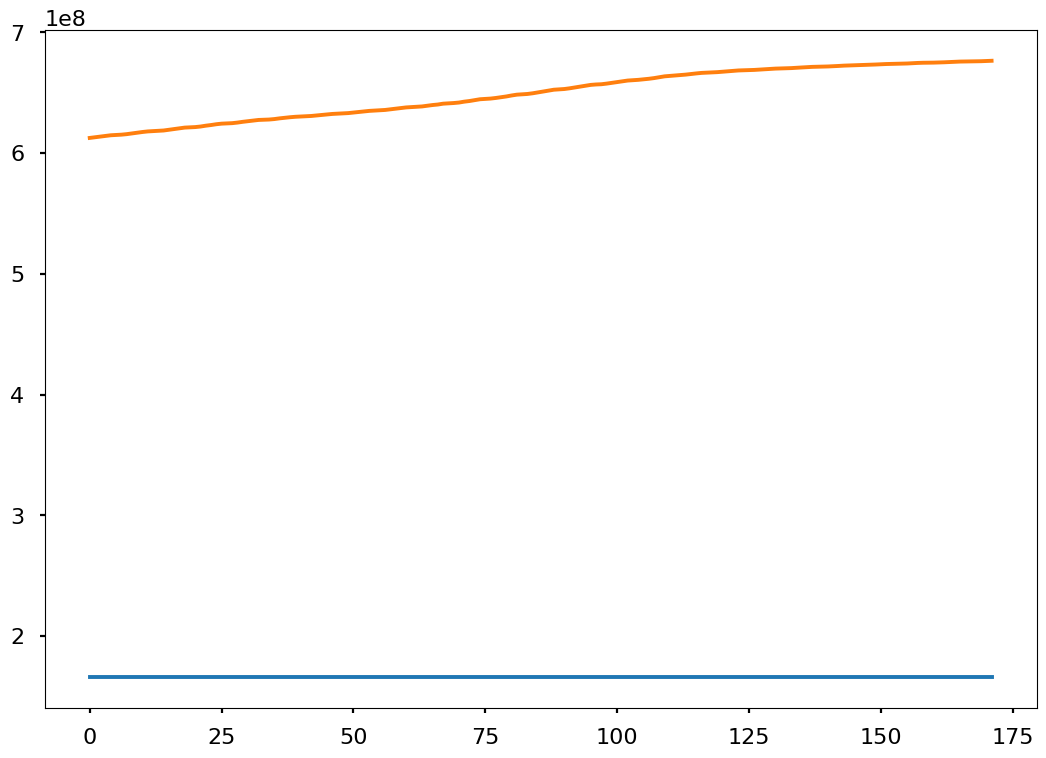

In [92]:
# checking against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [93]:
# linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 53995731.78554262
MSE: 3097416604661179.5


In [94]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[671932.81123313]]
[-1.14537126e+08]


In [95]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(), n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'tol': [0.0001, 0.001, 0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [96]:
bayesian_search.best_params_

{'tol': 0.001,
 'lambda_2': 0.0001,
 'lambda_1': 1e-06,
 'alpha_2': 0.0001,
 'alpha_1': 1e-07}

In [97]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 54031448.44910614
MSE: 3101193028604904.5


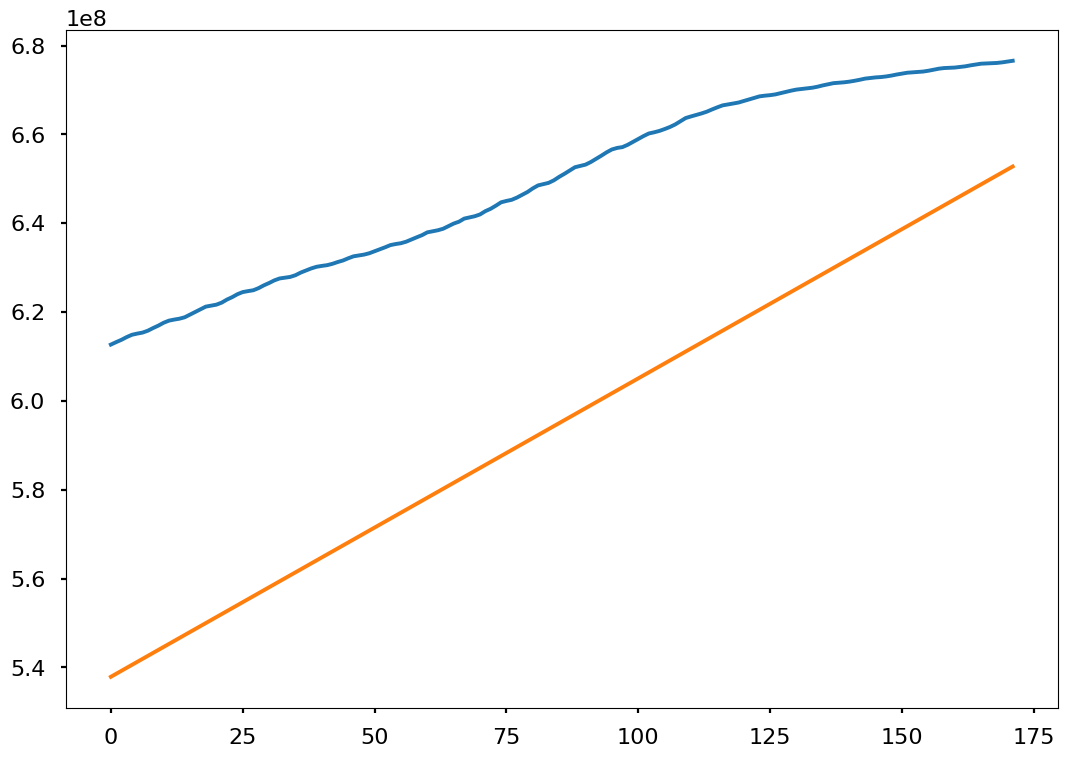

In [98]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

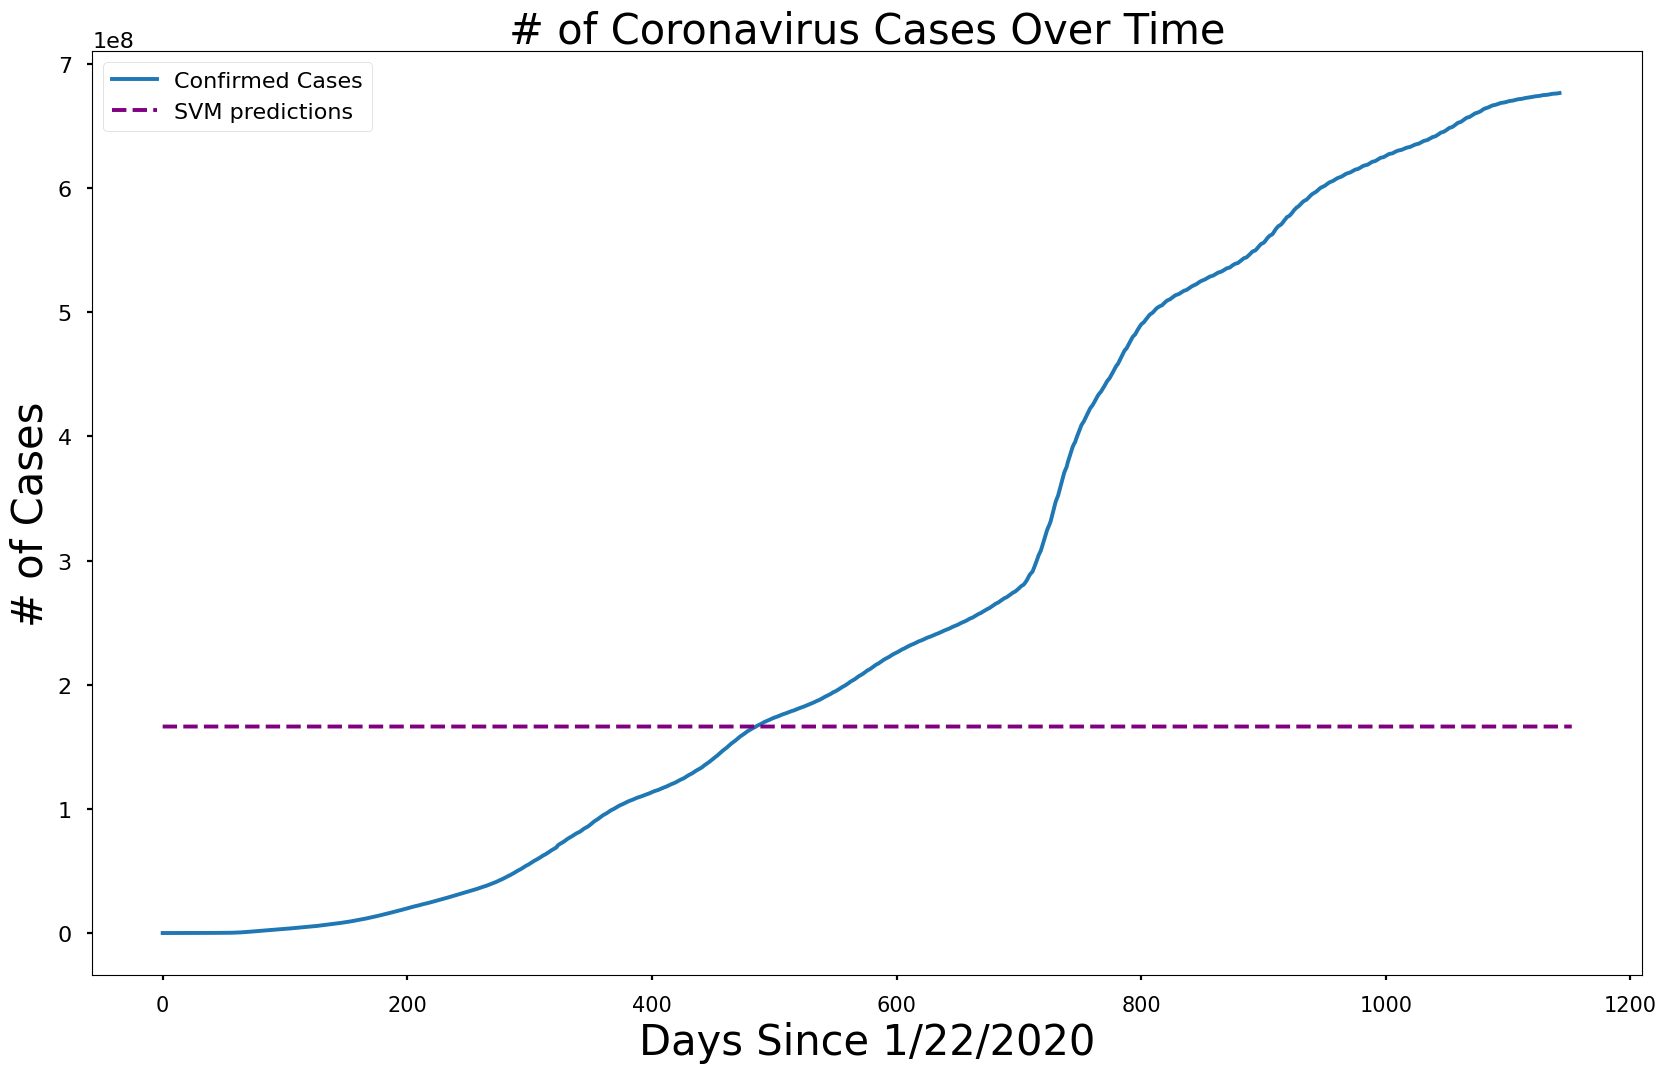

In [99]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

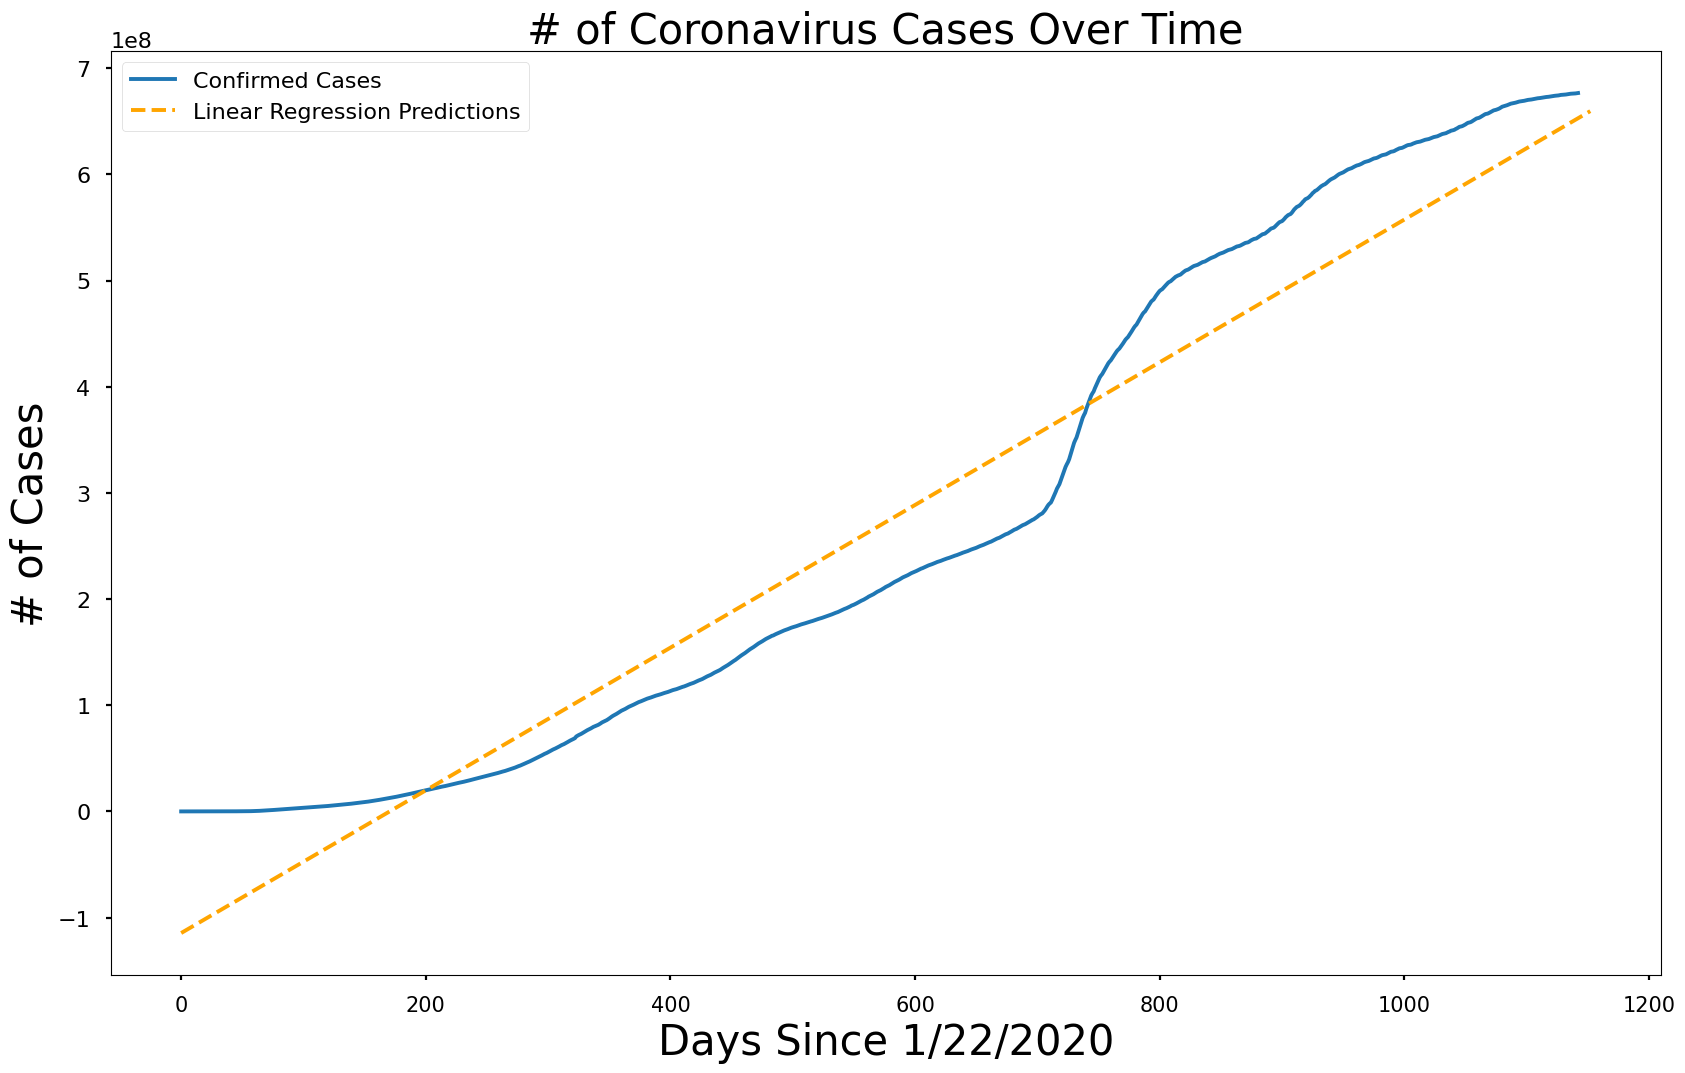

In [100]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

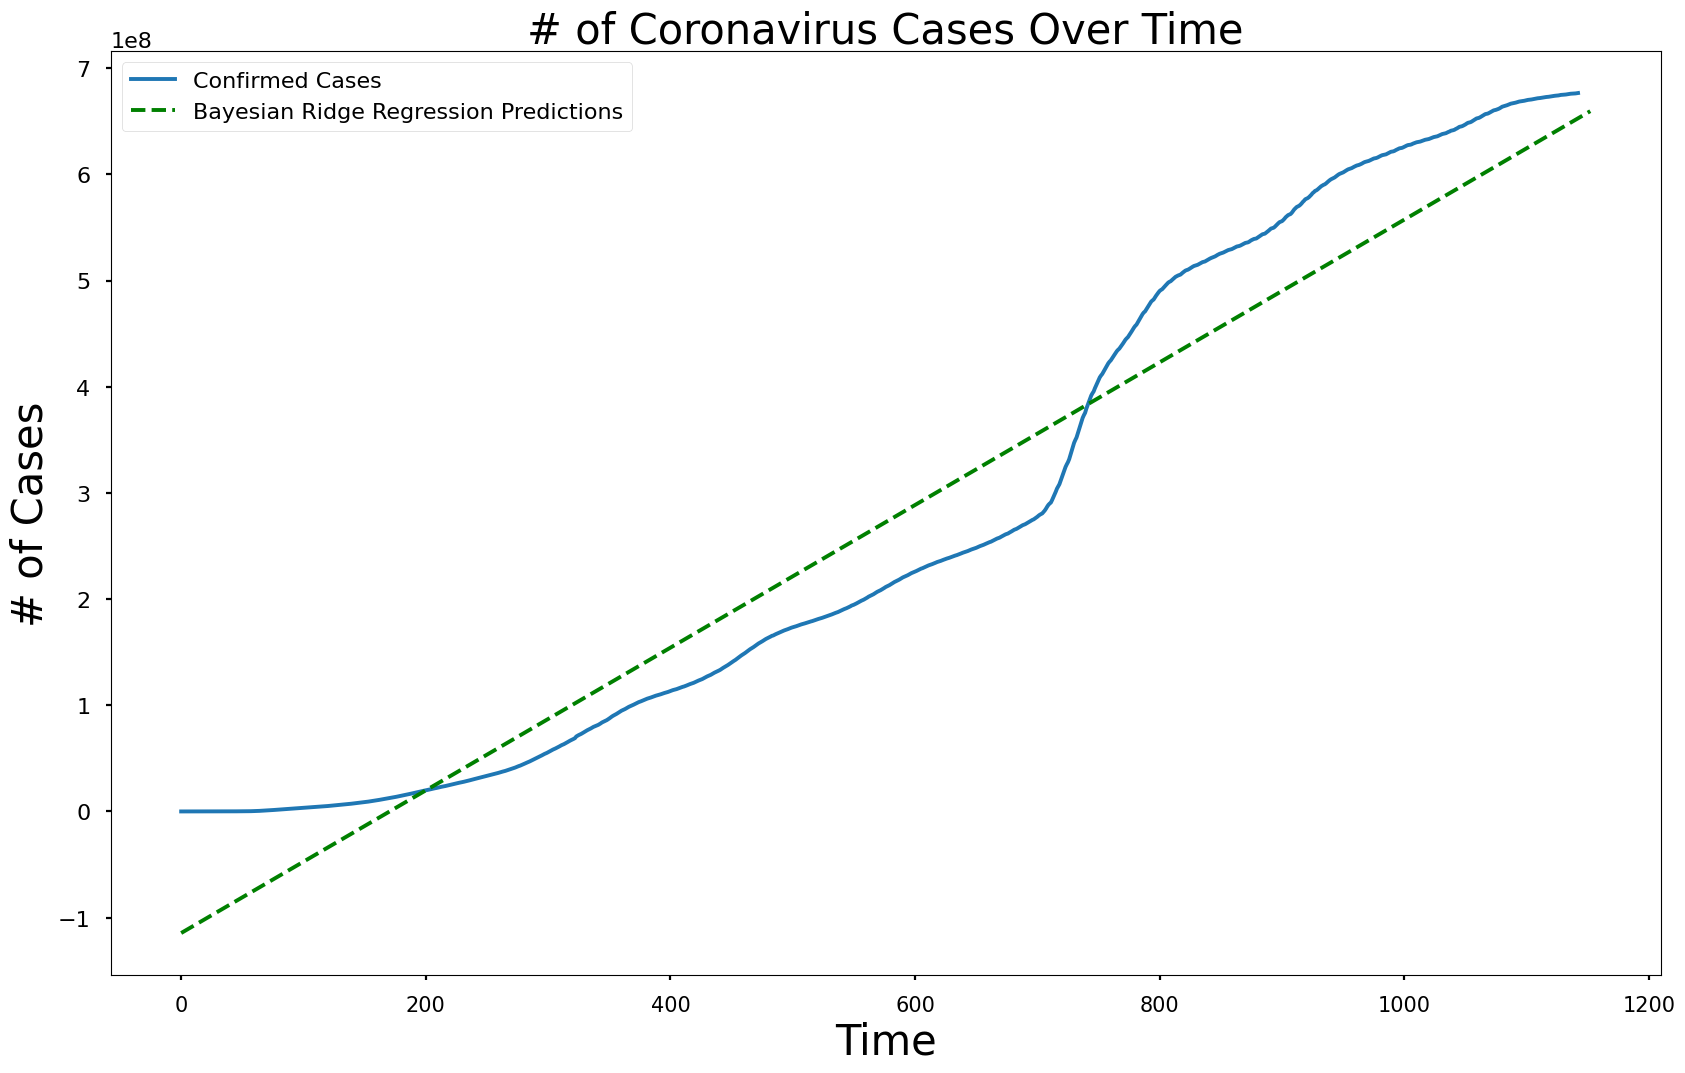

In [101]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

##RNN model and prediction

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_log_error
from keras.layers import SimpleRNN
import statistics
from tensorflow.keras.optimizers import Adam

In [102]:
world_daily['Daily New Confirmed']

Date
01/22/2020       557
01/23/2020       100
01/24/2020       287
01/25/2020       493
01/26/2020       683
               ...  
03/05/2023     56126
03/06/2023     58040
03/07/2023    130437
03/08/2023    179446
03/09/2023    177325
Name: Daily New Confirmed, Length: 1143, dtype: int64

In [103]:
world_daily.head()

,Daily New Confirmed,Daily New Confirmed_diff1
Date,,
01/22/2020,557,NaN
01/23/2020,100,-457.0
01/24/2020,287,187.0
01/25/2020,493,206.0
01/26/2020,683,190.0


In [104]:
df_fin=world_daily.copy()
df_fin.head()

,Daily New Confirmed,Daily New Confirmed_diff1
Date,,
01/22/2020,557,NaN
01/23/2020,100,-457.0
01/24/2020,287,187.0
01/25/2020,493,206.0
01/26/2020,683,190.0


In [105]:
# df_fin.drop(columns='Daily New Confirmed_diff1')
df_fin=df_fin[['Daily New Confirmed']]
df_fin.head()
df_fin['data']=df_fin.index

In [106]:
df_fin.head()

,Daily New Confirmed,data
Date,,
01/22/2020,557,01/22/2020
01/23/2020,100,01/23/2020
01/24/2020,287,01/24/2020
01/25/2020,493,01/25/2020
01/26/2020,683,01/26/2020


In [107]:
df_fin['data']=pd.to_datetime(df_fin['data'])

In [108]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 01/22/2020 to 03/09/2023
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Daily New Confirmed  1143 non-null   int64         
 1   data                 1143 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 59.1+ KB


In [109]:
df_fin.set_index(df_fin['data'])
print(df_fin.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 01/22/2020 to 03/09/2023
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Daily New Confirmed  1143 non-null   int64         
 1   data                 1143 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 59.1+ KB
None


In [110]:
# df_fin=df_fin[['Daily New Confirmed']]
df_fin.tail()
# df_fin[:-1]

,Daily New Confirmed,data
Date,,
03/05/2023,56126,2023-03-05
03/06/2023,58040,2023-03-06
03/07/2023,130437,2023-03-07
03/08/2023,179446,2023-03-08
03/09/2023,177325,2023-03-09


8/8 [==============================] - 0s 3ms/step
RMSLE train set:  0.333
RMSLE validation set:  0.253
8/8 [==============================] - 0s 3ms/step


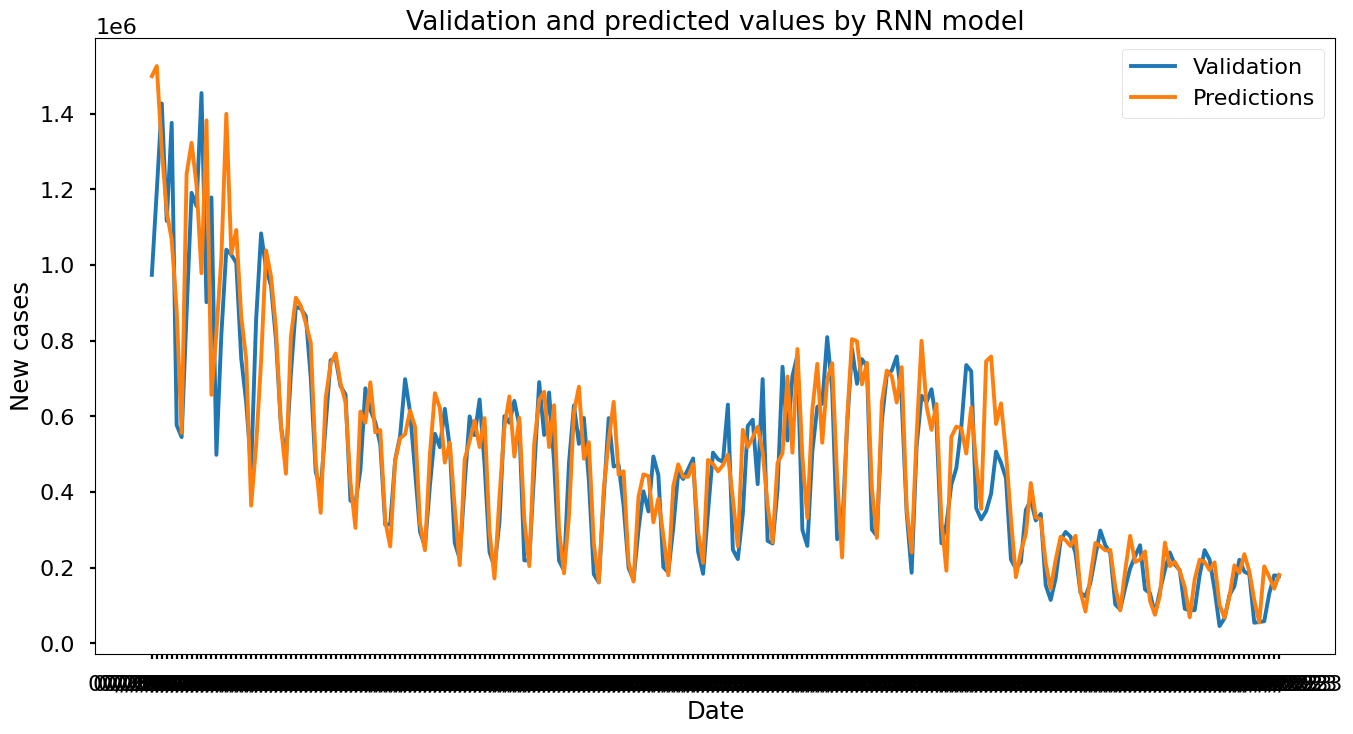

In [111]:
new_df=df_fin['Daily New Confirmed']


#Define the window of the RNN model and training set at 80%:
window=10
train_len = math.ceil(len(new_df)*0.8)
train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    
    # print("X_train:",X_train)
    Y_train.append(train_data[i])
    # print("Y_train:",Y_train)

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print("X_train final:",X_train)
# print("Y_train final:",Y_train)

#Define validation set at remaining 20%
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[] 
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
# print("X_val:",X_val)
# print("Y_val:",X_val)

X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

#Build the RNN network and train with proper set: 
r1=[]
r2=[]
model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))

opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

#Predict the label for train and validation sets, then compute RMSLE for both:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
lstm_train_pred[lstm_train_pred<0] = 0    #As we will compute logaritmic the argument must be greater or equal to 0
lstm_valid_pred[lstm_valid_pred<0] = 0
print('RMSLE train set: ', np.round(np.sqrt(mean_squared_log_error(Y_train, lstm_train_pred)),3))
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(Y_val, lstm_valid_pred)),3))
  
#Create new dataframe including actual validation data and predicted validation:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions'] = model.predict(X_val)

#Plot the both curves:
plt.figure(figsize=(16,8))
plt.title('Validation and predicted values by RNN model')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(valid[['Daily New Confirmed','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

#Return the new dataframe without NaN values, the model built and validation dataframe:
# return new_df.copy(), model, valid

## 3. Bayesian Ridge Regression Model Building and Prediction

In [112]:
dates = confirmed.keys()
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [113]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [114]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
days_to_skip = 790
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False) 

In [115]:
# transform our data for further regression
bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [116]:
# bayesian ridge regression modeling
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 
                 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 }

# bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 
#                  'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
#                  'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', 
                    cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [117]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 0.001,
 'lambda_1': 1e-06,
 'alpha_2': 1e-05,
 'alpha_1': 0.0001}

In [118]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 231184729.3876224
MSE: 5.380521466486401e+16


In [119]:
# r^2 calculation
from sklearn.metrics import r2_score
r2_score(world_cases, bayesian_pred[:-10])

0.855901033044391

In [120]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # Confirmed Globally': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

,Date,Bayesian Ridge Predicted # Confirmed Globally
0,03/10/2023,942268685.000000
1,03/11/2023,944743880.000000
2,03/12/2023,947223406.000000
3,03/13/2023,949707267.000000
4,03/14/2023,952195466.000000
5,03/15/2023,954688008.000000
6,03/16/2023,957184895.000000
7,03/17/2023,959686133.000000
8,03/18/2023,962191723.000000
9,03/19/2023,964701672.000000
